# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [2]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [6]:
# Sua análise da parte 1 começa aqui.
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   normal    10000 non-null  float64
 1   binomial  10000 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 156.4 KB


In [7]:
dataframe.head()

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21


## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [3]:
#np.percentile traz o percentil buscado em cada dataframe (25, 50 ou 75).
#Após é feita uma subtração do valor encontrado na coluna normal com o valor encontrado na coluna binomial.

def q1(df):
    return (round(np.percentile(np.array(df['normal']),25)-np.percentile(np.array(df['binomial']), 25),3),
            round(np.percentile(np.array(df['normal']),50)-np.percentile(np.array(df['binomial']), 50),3),
            round(np.percentile(np.array(df['normal']),75)-np.percentile(np.array(df['binomial']), 75),3))

In [4]:
q1(dataframe)

(0.31, -0.01, -0.316)

## Visualizando as distribuições normal e binomial

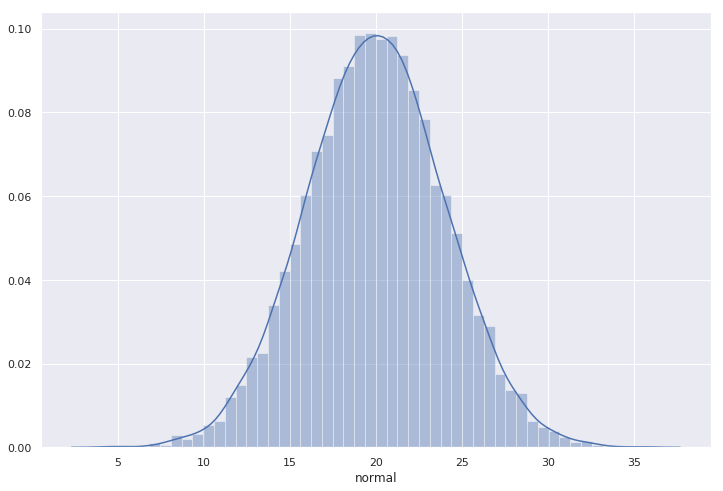

In [42]:
sns.distplot(dataframe['normal'])

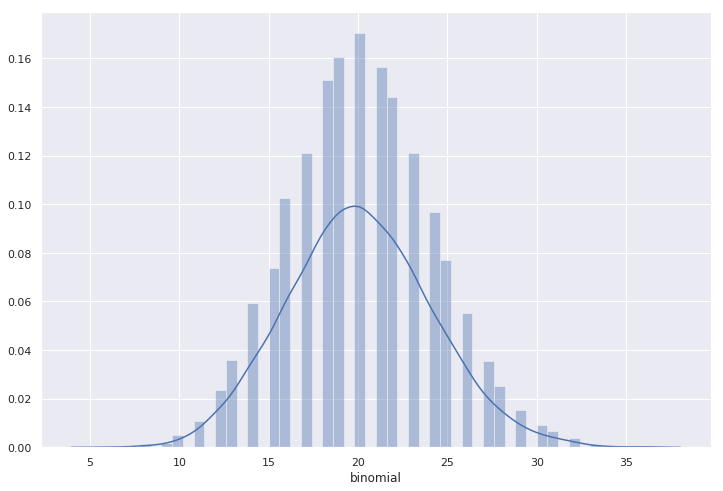

In [41]:
sns.distplot(dataframe['binomial'])

### Valores de média e variância de cada uma das distribuições

In [17]:
dataframe['normal'].mean()

19.991456066526293

In [14]:
dataframe['binomial'].mean()

20.097

In [15]:
dataframe['normal'].var()

16.110987985368958

In [16]:
dataframe['binomial'].var()

16.331224122412277

Para refletir:

* Você esperava valores dessa magnitude?                                                                            
**resposta**: como o tamanho da amostra é suficientemente grande (10000), a amostra binomial já esta tendendo a uma amostra normal. Desta maneira, é esperado que se veja a diferença entre o quartil de uma amostra e de outra tendendo a zero.


* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?
**resposta**: em uma distribuição binomial, para um determinado valor fixo de probabilidade, à medida que o tamanho da amostra aumenta, mais esta distribuição tende a ter o formato de uma distribuição normal. Desta maneira, é possível se obter valores de probabilidades para uma distribuição binomial a partir de uma distribuição normal.

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [48]:
normal = np.array(dataframe['normal'])

In [49]:
sum((sct.binom.cdf(i, 0, 1)) for i in normal) 

10000.0

In [50]:
#O valor desejado é encontrado a partir da subtração da área dada pela função norm.cdf para 𝑥¯+𝑠 com 𝑥¯-𝑠.
#Essa subtração dá o valor da área para compreendida entre o intervalo desejado.
def q2(normal):
    return float(round((sct.norm.cdf(normal.mean()+normal.std(), loc=20, scale=4)-
           sct.norm.cdf(normal.mean()-normal.std(), loc=20, scale=4)),3))

In [51]:
q2(normal)

0.684

Para refletir:

* Esse valor se aproxima do esperado teórico?                                                         
**resposta**: o valor trazido pela função "q2" está bem próximo ao valor teórico, visto que a função retorna 0.684 e o valor teórico (arredondado para três casas decimais) é de 0.683.


* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.                                                                                                                       
**resposta**:                                                                                                                
para $[\bar{x} - 2s, \bar{x} + 2s]$, valor calculado--> 0.955;   valor teórico-->0.954                                                                                                                                               

     para $[\bar{x} - 3s, \bar{x} + 3s]$, valor calculado--> 0.997;    valor teórico-->0.997


### Funções para o cálculo com dois e três desvios-padrão

In [52]:
def q2_dois_desvios(normal):
    return float(round((sct.norm.cdf(normal.mean()+(2*normal.std()), loc=20, scale=4)-
           sct.norm.cdf(normal.mean()-(2*normal.std()), loc=20, scale=4)),3))

In [54]:
def q2_três_desvios(normal):
    return float(round((sct.norm.cdf(normal.mean()+(3*normal.std()), loc=20, scale=4)-
           sct.norm.cdf(normal.mean()-(3*normal.std()), loc=20, scale=4)),3))

In [53]:
q2_dois_desvios(normal)

0.955

In [55]:
q2_três_desvios(normal)

0.997

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [5]:
#as funções .mean() e .var() são chamadas diretamente sobre as colunas do dataframe e a diferença entre elas
#é calculada.
def q3(df):
    return (round(df['binomial'].mean()-df['normal'].mean(),3),
            round(df['binomial'].var()-df['normal'].var(),3))

In [6]:
q3(dataframe)

(0.106, 0.22)

### Gráfico com a sobreposição das colunas `nomal` e `binomial` 

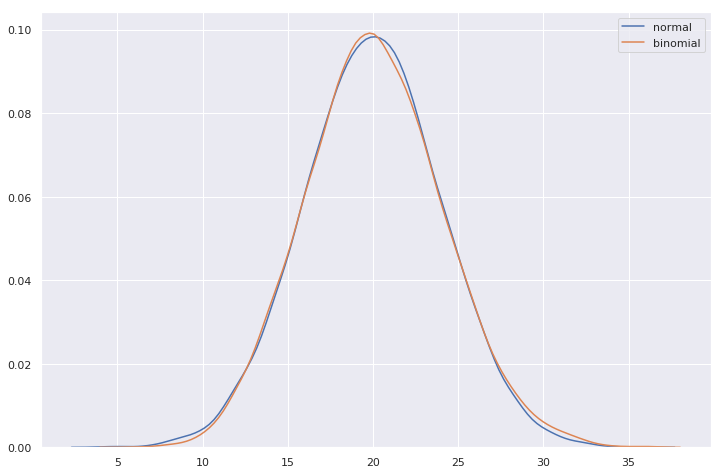

In [15]:
sns.kdeplot(dataframe['normal'], label="normal")
sns.kdeplot(dataframe['binomial'], label="binomial")

Para refletir:

* Você esperava valores dessa magnitude?                                                               
**resposta**: Sim. É possível perceber com a sobreposição dos gráficos que ambas as amostras estão centradas em torno do valor 20. Além disso, as curvas se ajustam com bastante semelhança, de modo que o desvio padrão, bem como a variância possuem valores parecidos. Desta maneira, há uma tendência que a diferença entre as médias das amostras e também das variâncias sejam próximas a zero. 


* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?   
**resposta**: Com o aumento ou a diminuição do valor de n, a média e a variância da distribuição binomial são alteradas, como pode ser visto no gráfico abaixo, criado a partir de um novo dataframe (dataframe_2)

In [7]:
#dataframe com os valores de 'n' alterados para a variável binomial
np.random.seed(42)
    
dataframe_2 = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial_n10": sct.binom.rvs(10, 0.2, size=10000),
                     "binomial_n100": sct.binom.rvs(100, 0.2, size=10000),       
                     "binomial_n1000": sct.binom.rvs(1000, 0.2, size=10000)})

### Gráfico com as variáveis normal e binomial (com outros valores para 'n')

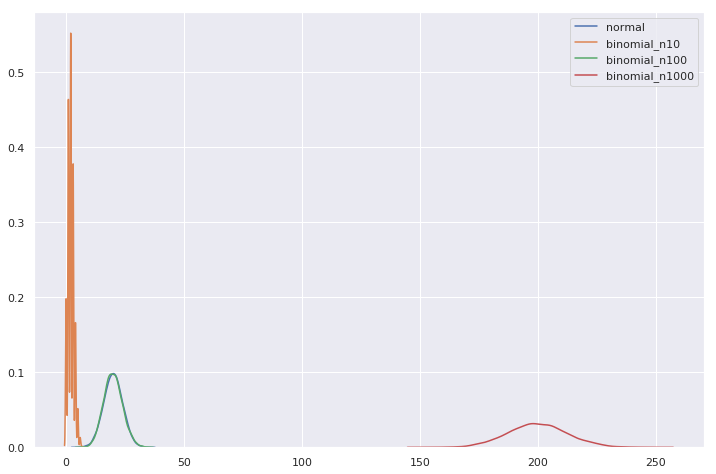

In [40]:
sns.kdeplot(dataframe_2['normal'], label="normal")
sns.kdeplot(dataframe_2['binomial_n10'], label="binomial_n10")
sns.kdeplot(dataframe_2['binomial_n100'], label="binomial_n100")
sns.kdeplot(dataframe_2['binomial_n1000'], label="binomial_n1000")

## Parte 2

### _Setup_ da parte 2

In [8]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [9]:
# Sua análise da parte 2 começa aqui.
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [47]:
#Primeiramente, um dataframe auxiliar (aux) é criado para filtrar apenas os valores de 'mean_profile' onde
#'target'==0 (ou False).

#Após, é criada uma nova coluna em aux para receber os valores 'mean_profile' padronizados segundo a fórmula do
#Zscore

#Com a utilização da função norm.ppf são criadas três novas variáveis para receber os valores dos quartis para
#as probabilidades desejadas (0.80, 0.90 e 0.95) e uma nova variável 'quartis' recebe estes valores.

#Na sequência, a varíavel 'ecdf' recebe os valores empíricos calculados para 'false_pulsar_mean_profile_standardized'

#Por fim, a função retorna os valores empíricos para cada um dos valores de probabilidade encontrados nos quartis
#desejados.

def q4(stars):
    aux = pd.DataFrame(stars['mean_profile'].loc[stars['target']==False])
    aux['false_pulsar_mean_profile_standardized'] = (aux-aux.mean())/(aux.std())
    q1 = sct.norm.ppf(0.80, loc=0, scale=1)
    q2 = sct.norm.ppf(0.90, loc=0, scale=1)
    q3 = sct.norm.ppf(0.95, loc=0, scale=1)
    quartis = [q1,q2,q3]
    ecdf = ECDF(aux['false_pulsar_mean_profile_standardized'])
    return (tuple(np.round(ecdf(quartis),3)))

In [48]:
q4(stars)

(0.806, 0.911, 0.959)

Para refletir:

* Os valores encontrados fazem sentido?                                                               
**resposta:** Sim, os valores trazidos pela função (0.806, 0.911, 0.959) estão bem próximos dos valores utilizados no cálculo (0.8, 0.9, 0.95). Como os valores são calculados empiricamente, é esperado que haja uma diferença.


* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?    
**resposta:** Os valores de probabilidade trazidos pela variável `false_pulsar_mean_profile_standardized` estão bem próximos de uma distribuição normal padrão.

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [53]:
#Primeiramente, um dataframe auxiliar (aux) é criado para filtrar apenas os valores de 'mean_profile' onde
#'target'==0 (ou False).

#Após, é criada uma nova coluna em aux para receber os valores 'mean_profile' padronizados segundo a fórmula do
#Zscore

#São criadas três novas variáveis (q1, q2 e q3) para receber a diferença entre os quartis da variável 
#`false_pulsar_mean_profile_standardized` e os valores teóricos calculados.

def q5(stars):
    aux = pd.DataFrame(stars['mean_profile'].loc[stars['target']==False])
    aux['false_pulsar_mean_profile_standardized'] = (aux-aux.mean())/(aux.std())
    
    q1 = round(np.percentile(np.array(aux['false_pulsar_mean_profile_standardized']),25)-              
               (sct.norm.ppf(0.25, loc=0, scale=1)),3)
        
    q2 = round(np.percentile(np.array(aux['false_pulsar_mean_profile_standardized']),50)-              
               (sct.norm.ppf(0.5, loc=0, scale=1)),3)
   
    q3 = round(np.percentile(np.array(aux['false_pulsar_mean_profile_standardized']),75)-              
               (sct.norm.ppf(0.75, loc=0, scale=1)),3)
    return (q1,q2,q3)

In [54]:
q5(stars)

(0.027, 0.04, -0.004)

Para refletir:

* Os valores encontrados fazem sentido?                                                               
**resposta**: Com a padronização da variável `mean_profile` é esperado que os valores correspondam a uma distribuição normal padrão. Os valores retornados pela função tendem a zero, o que era o esperado.


* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?    
**Resposta:** A variável representa uma aproximação de uma distribuição normal padrão, o que significa que é possível se calcular as probabilidades segundo uma normal padrão.


* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.